# 신경망과의 첫 만남

In [1]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [8]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

W0929 13:49:40.871971 10124 deprecation_wrapper.py:119] From C:\Users\Administrator\.conda\envs\multicampus\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0929 13:49:40.910939 10124 deprecation_wrapper.py:119] From C:\Users\Administrator\.conda\envs\multicampus\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0929 13:49:40.923976 10124 deprecation_wrapper.py:119] From C:\Users\Administrator\.conda\envs\multicampus\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [9]:
network.compile(optimizer='rmsprop',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

W0929 13:50:27.428938 10124 deprecation_wrapper.py:119] From C:\Users\Administrator\.conda\envs\multicampus\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0929 13:50:27.463943 10124 deprecation_wrapper.py:119] From C:\Users\Administrator\.conda\envs\multicampus\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [10]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [11]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [12]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

W0929 13:54:44.893782 10124 deprecation.py:323] From C:\Users\Administrator\.conda\envs\multicampus\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0929 13:54:44.972781 10124 deprecation_wrapper.py:119] From C:\Users\Administrator\.conda\envs\multicampus\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/5
60000/60000 [==============================] - 5s 82us/step - loss: 0.2599 - acc: 0.9257
Epoch 2/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.1025 - acc: 0.9694
Epoch 3/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.0676 - acc: 0.9800
Epoch 4/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.0497 - acc: 0.9855
Epoch 5/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.0377 - acc: 0.9890


In [13]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 64us/step


In [14]:
print('test_acc:', test_acc)

test_acc: 0.9798


# 신경망을 위한 데이터 표현

## 스칼라(0D 텐서)

In [15]:
import numpy as np

x = np.array(12)

In [16]:
x

array(12)

In [17]:
x.ndim

0

## 벡터(1D 텐서)

In [18]:
x = np.array([12, 3, 6, 14, 7])

In [19]:
x

array([12,  3,  6, 14,  7])

In [20]:
x.ndim

1

## 행렬(2D 텐서)

In [21]:
x = np.array([[5,78,2, 34, 0],
             [6,79,3,35,1],
             [7,80,4,36,2]])

In [22]:
x.ndim

2

## 3D 텐서와 고차원 텐서

In [23]:
x = np.array([[[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]],
             [[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]],
             [[5, 78, 2, 35, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]]])

In [24]:
x.ndim

3

## 핵심 속성
1. 축의 개수(랭크) : ndim 속성에 저장되어 있음
2. 크기 : shape 속성에 저장되어 있음
3. 데이터 타입 : dtype 속성에 저장되어 있음

In [25]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [26]:
print(train_images.ndim)

3


In [27]:
print(train_images.shape)

(60000, 28, 28)


In [28]:
print(train_images.dtype) # 8비트 정수형 3D 텐서를 의미함

uint8


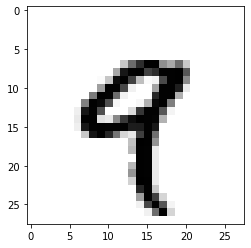

In [30]:
digit = train_images[4]
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## 넘파이로 텐서 조작하기

In [31]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [32]:
my_slice = train_images[10:100, :, :] # 위와 동일함

In [33]:
my_slice.shape

(90, 28, 28)

In [34]:
my_slice = train_images[10:100, 0:28, 0:28] # 역시 위와 동일함

In [35]:
my_slice.shape

(90, 28, 28)

In [36]:
my_slice = train_images[:, 14:, 14:]

In [37]:
my_slice = train_images[:, 7:-7, 7:-7] # 정중앙에 위치한 14 x 14 픽셀 조각 추출

## 배치 데이터

In [38]:
# 첫번째 배치
batch = train_images[:128]

In [39]:
# 두번째 배치
batch = train_images[128:256]

In [40]:
# n번째 배치
batch = train_images[128 * n:128 * (n+1)]

NameError: name 'n' is not defined

## 텐서의 실제 사례
1. 벡터 데이터 : (samples, features) 크기의 2D 텐서
2. 시계열 데이터 또는 시퀀스(sequence) 데이터: (samples, timesteps, features) 크기의 3D 텐서
3. 이미지 : (samples, height, width, channels) 또는 (samples, channels, height, width) 크기의 4D 텐서
4. 동영상 : (samples, frames, height, width, channels) 또는 (samples, frames, channels, height, width) 크기의 5D 텐서

# 신경망의 톱니바퀴 : 텐서 연산

## 원소별 연산

In [41]:
def naive_relu(x):
    assert len(x.shape) == 2 # assert는 가정설정문이다. x.shape이 2가 아니면 에러를 뿜는다.
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [42]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [43]:
import numpy as np

z = x + y
z = np.maximum(z, 0.)

NameError: name 'y' is not defined

## 브로드캐스팅
1. 큰 텐서의 ndim에 맞도록 작은 텐서에 (브로드캐스팅 축이라고 부르는) 축이 추가됩니다.
2. 작은 텐서가 새 축을 따라서 큰 텐서의 크기에 맞도록 반복됩니다.

In [44]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [45]:
import numpy as np

x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))

z = np.maximum(x, y)

## 벡터 점곱 (내적)

In [46]:
import numpy as np
z = np.dot(x, y)

ValueError: shapes (64,3,32,10) and (32,10) not aligned: 10 (dim 3) != 32 (dim 0)

In [50]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [49]:
import numpy as np
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[i]
    return z

In [51]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [52]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

## 텐서 크기 변환

In [53]:
train_images = train_images.reshape((60000, 28*28))

In [54]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])

In [55]:
print(x.shape)

(3, 2)


In [56]:
x = x.reshape((6,1))

In [57]:
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [58]:
x = x.reshape((2,3))

In [59]:
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [60]:
x = np.zeros((300, 20))
x = np.transpose(x)
print(x.shape)

(20, 300)


# 신경망의 엔진: 그래디언트 기반 최적화

훈련 반복 루프에서 일어나는 일
1. 훈련 샘플 x와 이에 상응하는 타깃 y의 배치를 추출합니다.
2. x를 사용하여 네트워크를 실행하고(정방향 패스 단계), 예측 y_pred를 구합니다.
3. y_pred와 y의 차이를 측정하여 이 배치에 대한 네트워크의 손실을 계산합니다.
4. 배치에 대한 손실이 조금 감소되도록 네트워크의 모든 가중치를 업데이트합니다.

## 확률적 경사 하강법
1. 훈련 샘플 배치 x와 이에 상응하는 타깃 y를 추출합니다.
2. x로 네트워크를 실행하고 예측 y_pred를 구합니다.
3. 이 배치에서 y_pred와 y사이의 오차를 측정하여 네트워크의 손실을 계산합니다.
4. 네트워크의 파라미터에 대한 손실 함수의 그래디언트를 계산합니다(역방향 패스)
5. 그래디언트의 반대 방향으로 파라미터를 조금 이동시킵니다. 예를 들어 W -= step * gradient처럼 하면 배치에 대한 손실이 조금 감소할 것입니다.

# 요약
* 학습은 훈련 데이터 샘플과 그에 상응하는 타깃이 주어졌을 때 손실 함수를 최소화하는 모델 파라미터의 조합을 찾는 것을 의미합니다.
* 데이터 샘플과 타깃의 배치를 랜덤하게 뽑고 이 배치에서 손실에 대한 파라미터의 그래디언트를 계산함으로써 학습이 진행됩니다. 네트워크의 파라미터는 그래디언트의 반대 방향으로 조금씩(학습률에 의해 정의된 크기만큼) 움직입니다.
* 전체 학습 과정은 신경망이 미분 가능한 텐서 연산으로 연결되어 있기 때문에 가능합니다. 현재 파라미터와 배치 데이터를 그래디언트 값에 매핑해 주는 그래디언트 함수를 구성하기 위해 미분의 연쇄 법칙을 사용합니다.
* 이어지는 장에서 자주 보게 될 두 가지 핵심 개념은 손실과 옵티마이저입니다. 이 두 가지는 네트워크에 데이터를 주입하기 전에 정의되어야 합니다.
* 손실을 훈련하는 동안 최소화해야 할 양이므로 해결하려는 문제의 성공을 측정하는 데 사용합니다.
* 옵티마이저는 손실에 대한 그래디언트가 파라미터를 업데이트하는 정확한 방식을 정의합니다. 예를 들어 RMSProp 옵티마이저, 모멘텀을 사용한 SGD 등입니다.